### import libraries

In [4]:
import numpy as np
import pandas as pd

#### Read the Dataset

In [5]:
data = pd.read_csv(r'D:\Data Analytics CSE4027\Project\zomato.csv')

In [6]:
data.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [7]:
data_review= data['reviews_list']

In [8]:
x=[]
y=[]

#here we tokenize the rating string and the review string
#loop over all the rows

for row_num in range(0,51717):
    #split the review text at the " (' "
    lst= data_review[row_num].split("('")
    for i in lst:
        if len(i) > 5:
            if i.find("',") != -1:
                single_rev= i.split("',")
                if len(single_rev[0]) >2:
                    x.append(single_rev[0])
                if len(single_rev[1]) >2:
                    y.append(single_rev[1])

### Preprocessing -1

In [9]:
import nltk
nltk.download("stopwords")
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
ps= PorterStemmer()

#to store the final rating
rating_final =[]
#to store the cleaned reivews
review_final =[]

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\91630\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [10]:
#the rating string contains words and numbers
#so we tokenize the numbers only from it and change into float
#i.e. Rating:4.0 --> 4.0
#also for rating below 2.5 store as POOR
#for rating between 2.5 and 3.5 store as AVERAGE
#for rating above 3.5 store as GOOD

import re
for loop in range(0,40000):
    data_x= x[loop]
    data_x= re.sub('[a-zA-Z]'," ", data_x)
    data_x= data_x.split()
    data_x= ''.join(data_x)
    data_x= float(data_x)
    if data_x < 2.5:
        rating_final.append("POOR")
    elif data_x>=2.5 and data_x<=3.5:
        rating_final.append("AVERAGE")
    elif data_x>3.5:
        rating_final.append("GOOD")

### Preprocessing-2

In [11]:
#label encode the ratings and OneHotEncode for the classification
#as our x column has textual values we hav eto binarise these texual values 
#so we first convert textual data to integer encoding using label encoder

from sklearn.preprocessing import LabelEncoder
le= LabelEncoder()
rating_final= le.fit_transform(rating_final)
#now convert the rating column in to arrays and expand its dimensions to 2D array
rating_final= np.array(rating_final)
rating_final= np.expand_dims(rating_final, axis=1)
#now convert the integer encoding in to binary values
from sklearn.preprocessing import OneHotEncoder
one= OneHotEncoder()
rates= one.fit_transform(rating_final).toarray()

In [12]:
#here the unnecessary stopwords from the reviews lists
#stemming operations are also done here


for loop in range(0,40000):
    data_y= y[loop]
    data_y= re.sub('[^a-zA-Z]', " ",data_y)
    data_y= data_y.split()
    data_y= [ps.stem(word) for word in data_y if not word in set(stopwords.words('english'))]
    data_y= ' '.join(data_y)
    review_final.append(data_y)

### Preprocessing-3

In [13]:
#count vectorize the reviews according to the unique words

from sklearn.feature_extraction.text import CountVectorizer
cv= CountVectorizer(max_features = 20000)
x_final= cv.fit_transform(review_final).toarray()

#saving the vectorizer which would be used as dictionary
import pickle
pickle.dump(cv, open('cv.pkl','wb'))

In [14]:
#Splitting the data into test and train sets
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x_final,rates,test_size=0.2, random_state=0)

In [15]:
x_train

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [16]:
y_train

array([[1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       ...,
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.]])

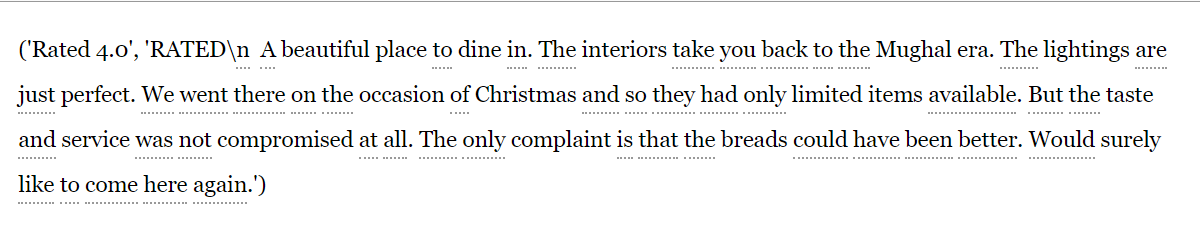

#### label encoding:
 
     AVERAGE:0   
 
     GOOD:1   
 
     POOR:2

#### OneHotEncoding:

    AVERAGE: 1 0 0 

    GOOD:    0 1 0

    POOR:    0 0 1

In [ ]:
import keras
import tensorflow-gpu

In [3]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout, GRU, Bidirectional, Embedding, SpatialDropout1D
from tensorflow.keras.optimizers import SGD
#import math
from sklearn.metrics import mean_squared_error

# Model building 1 - DNN

In [16]:
modelDN = Sequential()
modelDN.add(Dense(units = 13264, kernel_initializer  = 'random_uniform', activation= 'sigmoid'))
modelDN.add(Dense(units = 2000, kernel_initializer  = 'random_uniform', activation= 'sigmoid'))
modelDN.add(Dense(units = 2000, kernel_initializer  = 'random_uniform', activation= 'sigmoid'))
modelDN.add(Dense(units = 2000, kernel_initializer  = 'random_uniform', activation= 'sigmoid'))
modelDN.add(Dense(units = 3, kernel_initializer  = 'random_uniform', activation= 'softmax'))
modelDN.compile(optimizer= 'adam', loss = 'categorical_crossentropy',metrics=['accuracy'])
modelDN.fit(x_train,y_train,batch_size =128,epochs=50)

Epoch 1/50
250/250 [==============================] - 235s 930ms/step - loss: 1.1646 - accuracy: 0.4717
Epoch 2/50
250/250 [==============================] - 238s 951ms/step - loss: 1.0510 - accuracy: 0.4801
Epoch 3/50
250/250 [==============================] - 217s 870ms/step - loss: 1.0510 - accuracy: 0.4821
Epoch 4/50
250/250 [==============================] - 216s 865ms/step - loss: 1.0546 - accuracy: 0.4773
Epoch 5/50
250/250 [==============================] - 228s 913ms/step - loss: 1.0529 - accuracy: 0.4794
Epoch 6/50
250/250 [==============================] - 214s 856ms/step - loss: 1.0512 - accuracy: 0.4850
Epoch 7/50
250/250 [==============================] - 210s 839ms/step - loss: 1.0489 - accuracy: 0.4854
Epoch 8/50
250/250 [==============================] - 209s 838ms/step - loss: 1.0462 - accuracy: 0.4873
Epoch 9/50
250/250 [==============================] - 213s 850ms/step - loss: 1.0495 - accuracy: 0.4839
Epoch 10/50
250/250 [==============================] - 211s 845m

#### The DNN model suffers from Vanishing Gradient Descent problem. So using LSTM model for the Sentiment analysis.

# Model building 2 - LSTM (Long Short Term Memory)

In [17]:
#Model prep
modelLSTM=Sequential()
modelLSTM.add(Embedding(3000,32,input_length=x_train.shape[1]))
modelLSTM.add(LSTM(32,dropout=0.33,recurrent_dropout=0.2))
#modelLSTM.add(LSTM(16,dropout=0.1,recurrent_dropout=0.1))
modelLSTM.add(Dense(3,activation='softmax'))
modelLSTM.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
modelLSTM.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 13354, 32)         96000     
_________________________________________________________________
lstm (LSTM)                  (None, 32)                8320      
_________________________________________________________________
dense (Dense)                (None, 3)                 99        
Total params: 104,419
Trainable params: 104,419
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history=modelLSTM.fit(x_train,y_train,verbose=2,batch_size=1600,epochs=5,validation_split=0.33)

Epoch 1/5


In [ ]:
#Choosing a certain validation size
valid=2000 #Validating on 2000 rows of the test set
X_validate=x_train[-valid:]
Y_validate=y_train[-valid:]
score,acc=modelLSTM.evaluate(X_validate,Y_validate,verbose=2,batch_size=1600)
score_test,acc_test=modelLSTM.evaluate(X_test,Y_test,verbose=2,batch_size=1600)